In [32]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd


# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

- Buscar un conjunto de datos a analizar. 
Se recomienda que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico.

In [39]:
df=pd.read_csv("datos/airline.csv", index_col=False)
df.head(2)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0


In [46]:
df.drop(['Departure/Arrival time convenient', 'Gate location','Inflight wifi service',
'Online support', 'Leg room service','Baggage handling','Departure Delay in Minutes', 'Arrival Delay in Minutes'],axis=1, inplace=True)

In [47]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Food and drink,Inflight entertainment,Ease of Online booking,On-board service,Checkin service,Cleanliness,Online boarding
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,4,3,3,5,3,2
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,2,3,4,2,3,2
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,2,3,4,4,2
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,4,1,1,4,1,3
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,3,2,2,4,2,5


Definimos nuestra variable categorica la cual es : "satisfaction", vamos a ver la cantidad de valores que tenemos para la variable respuesta.

In [38]:
df["satisfaction"].value_counts()

satisfied       71087
dissatisfied    58793
Name: satisfaction, dtype: int64

Antes de empezar el EDA vemos la necesidad de reducir columnas debido al poco tiempo que tenemos y nos quedaremos sólo con las que consideremos más interesantes.

In [48]:
df.shape

(129880, 15)

In [52]:
df.head(2)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Food and drink,Inflight entertainment,Ease of Online booking,On-board service,Checkin service,Cleanliness,Online boarding
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,4,3,3,5,3,2
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,2,3,4,2,3,2


In [49]:
df.dtypes

satisfaction              object
Gender                    object
Customer Type             object
Age                        int64
Type of Travel            object
Class                     object
Flight Distance            int64
Seat comfort               int64
Food and drink             int64
Inflight entertainment     int64
Ease of Online booking     int64
On-board service           int64
Checkin service            int64
Cleanliness                int64
Online boarding            int64
dtype: object

In [50]:
df.isnull().sum()

satisfaction              0
Gender                    0
Customer Type             0
Age                       0
Type of Travel            0
Class                     0
Flight Distance           0
Seat comfort              0
Food and drink            0
Inflight entertainment    0
Ease of Online booking    0
On-board service          0
Checkin service           0
Cleanliness               0
Online boarding           0
dtype: int64

In [57]:
df.describe(include=int).T

,count,mean,std,min,25%,50%,75%,max
Age,129880.0,39.427957,15.119360,7.0,27.0,40.0,51.0,85.0
Flight Distance,129880.0,1981.409055,1027.115606,50.0,1359.0,1925.0,2544.0,6951.0
Seat comfort,129880.0,2.838597,1.392983,0.0,2.0,3.0,4.0,5.0
Food and drink,129880.0,2.851994,1.443729,0.0,2.0,3.0,4.0,5.0
Inflight entertainment,129880.0,3.383477,1.346059,0.0,2.0,4.0,4.0,5.0
Ease of Online booking,129880.0,3.472105,1.305560,0.0,2.0,4.0,5.0,5.0
On-board service,129880.0,3.465075,1.270836,0.0,3.0,4.0,4.0,5.0
Checkin service,129880.0,3.340807,1.260582,0.0,3.0,3.0,4.0,5.0
Cleanliness,129880.0,3.705759,1.151774,0.0,3.0,4.0,5.0,5.0
Online boarding,129880.0,3.352587,1.298715,0.0,2.0,4.0,4.0,5.0


In [55]:
df.describe(include="object").T

,count,unique,top,freq
satisfaction,129880,2,satisfied,71087
Gender,129880,2,Female,65899
Customer Type,129880,2,Loyal Customer,106100
Type of Travel,129880,2,Business travel,89693
Class,129880,3,Business,62160


In [51]:
#Miramos los duplicados
df.duplicated().sum()

9

In [59]:
#Los eliminamos
df.drop_duplicates(inplace=True)

In [60]:
#Verificamos
df.duplicated().sum()

0

Listo ya no tenemos nulos. continuemos...

#### Analisis exploratorio visual

Variable respuesta

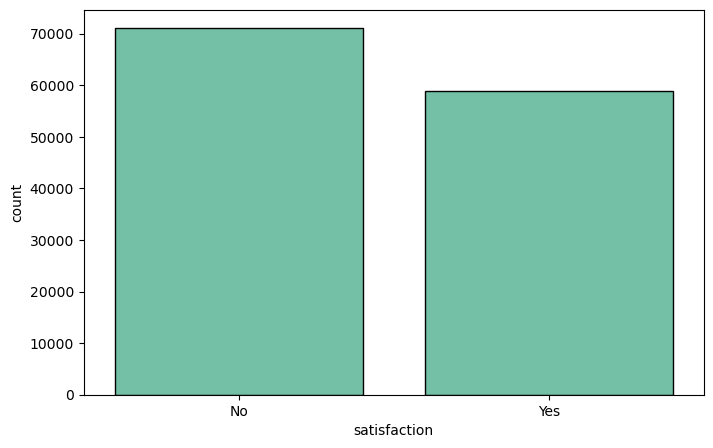

In [62]:
plt.figure(figsize=(8,5)) # para cambiar el tamaño de la figura

fig1 = sns.countplot(data = df, x = "satisfaction",  color = "mediumaquamarine",  edgecolor='black')
fig1.set(xticklabels=["No", "Yes"]) 
plt.show();

Variables categoricas

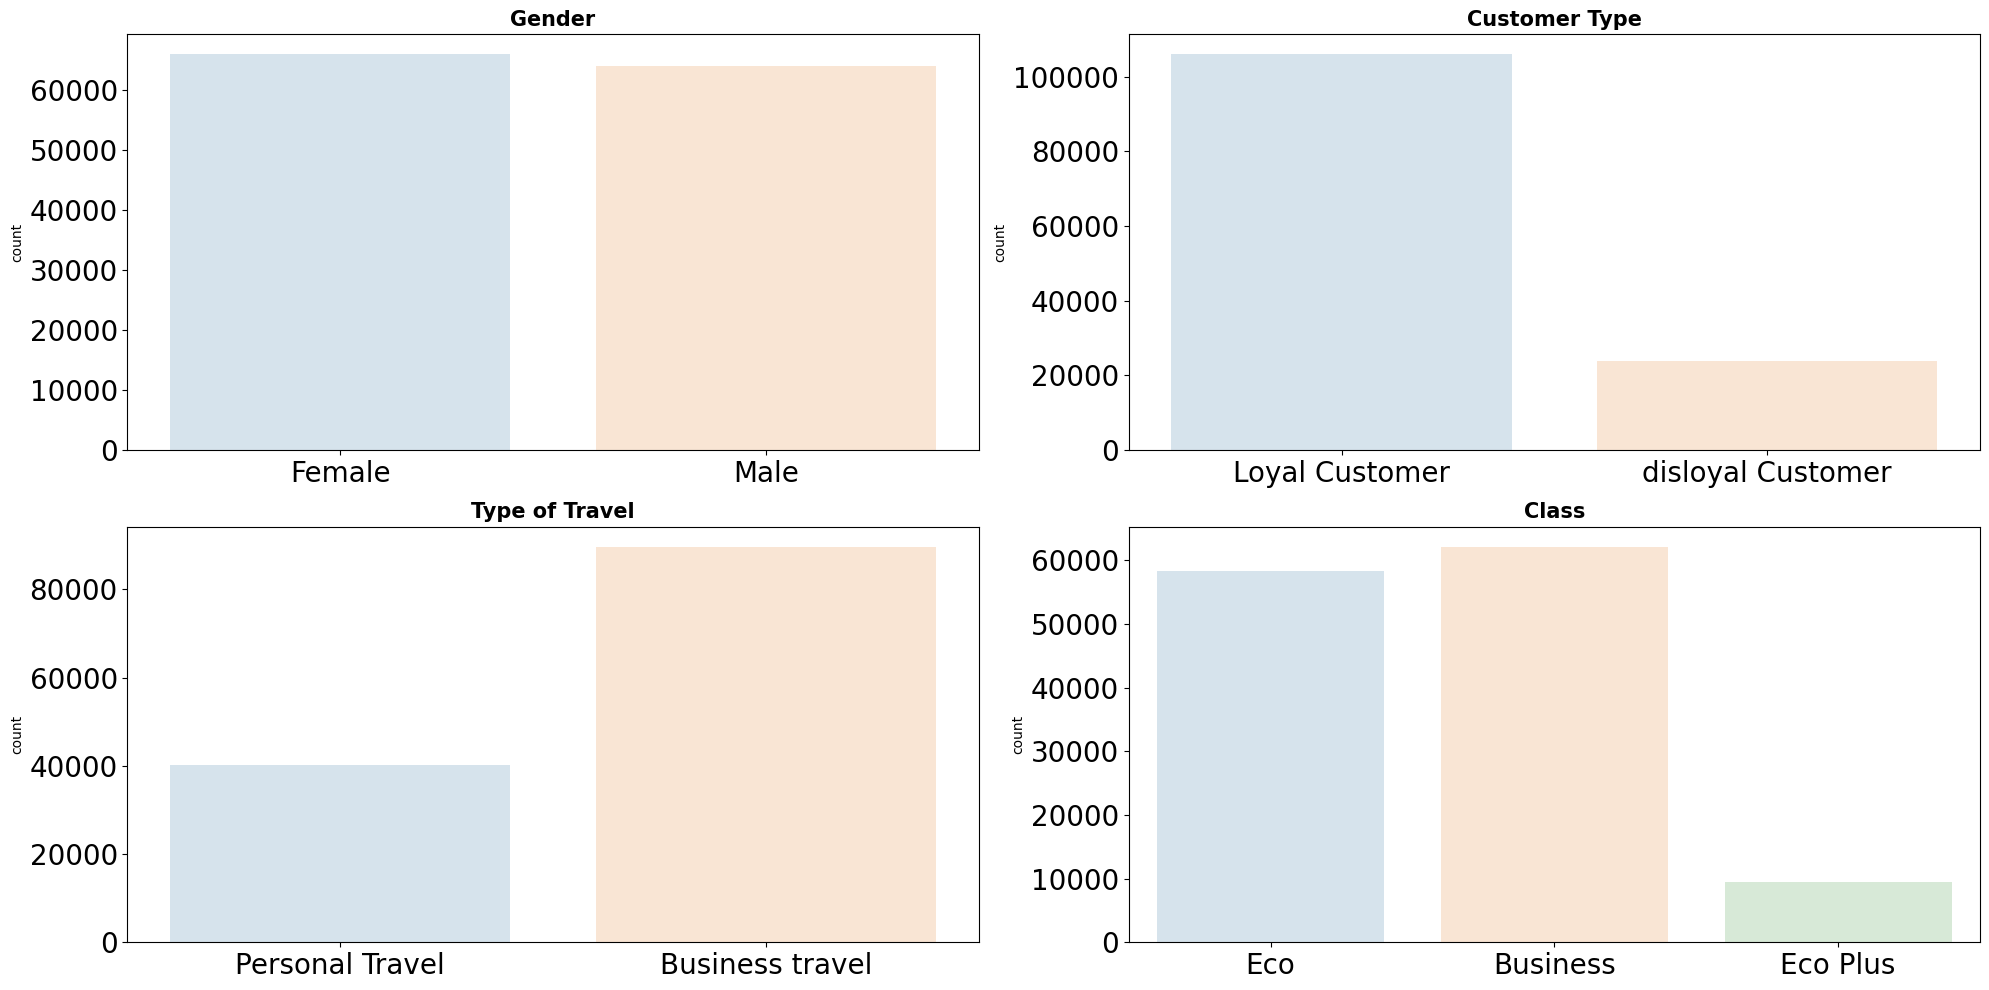

In [80]:
# Gráfico de distribución para cada variable categórica
# ==============================================================================

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 10))

axes = axes.flat
columnas_cat = df.select_dtypes(include = "object").columns.drop("satisfaction")

for i, colum in enumerate(columnas_cat): 
    sns.countplot(
        data = df,
        x = colum,
        #hue = "satisfaction",
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    #axes[i].legend(loc= "upper right")

fig.tight_layout();

- Explicar los datos y las variables disponibles en el conjunto de datos seleccionado

- Realizar un EDA sencillo poniendo en práctica los conocimientos adquiridos hasta el momento.

- Interpretación de los resultados.